$13^{th}$ Aug 2021

In [1]:
import pandas as pd
import os, glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from ipywidgets import widgets, interactive

In [2]:
dt = datetime.today().strftime(format='%d-%m-%Y')

In [3]:
def replace_with_who_lin(x):
    if x == 'B.1.1.7':
        return x.replace(x, 'B.1.1.7(Alpha)')
    if x == 'B.1.617.2':
        return x.replace(x, 'B.1.617.2(Delta)')
    if x == 'B.1.351':
        return x.replace(x, 'B.1.351(Beta)')
    if x == 'B.1.525':
        return x.replace(x, 'B.1.525(Eta)')
    return x
    

In [4]:
'sequence_name', 'clade', 'lineage', 'genome_coverage'


('sequence_name', 'clade', 'lineage', 'genome_coverage')

In [5]:
df_seq_summ = pd.read_excel('/home/douso/SarsGenomics/QCstats.Analysis_OUSO_17-08-2021.xlsx', 
                   sheet_name='summary')#usecols=['sequence_name', 'clade', 'lineage', 'genome_coverage'], 

In [6]:
df_seq_summ.head()

,sequence_name,clade,lineage,genome_coverage,run_num,seq_dt
0,COVC11310,20C,B.1,59.3,Run1,09-02-2021
1,COVC00854,20C,B.1,94.9,Run7,18-05-2021
2,COVC00867,20C,B.1.446,68.2,Run7,18-05-2021
3,COVC00893,20C,B.1.446,84.1,Run7,18-05-2021
4,COVC00915,NaN,Failed,0.0,Run7,18-05-2021


In [7]:
voc_list = ['B.1.1.7', 'B.1.351', 'P.1', 'B.1.617.2', 'A23.1', 'B.1.525']

In [8]:
df_seq_summ['lineage'].unique()

array(['B.1', 'B.1.446', 'Failed', 'Unkown', 'B.1.1', 'B.1.1.406',
       'B.1.605', 'A', 'B.1.349', 'B.1.336', 'B.1.1.54', 'B.1.276',
       'B.1.361', 'B.1.549', 'A.25', 'B.1.153', 'B.1.530', 'B.1.103',
       'B.1.390', 'B.1.302', 'B.1.333', 'A.23', 'B.1.535', 'B.1.214',
       'B.1.160', 'B.1.378', 'B.1.433', 'B.1.596.1', 'B.1.596', 'B.1.551',
       'B.1.324', 'B.1.520', 'B.1.612', 'B.1.1.171', 'B.1.343',
       'B.1.1.70', 'B.1.404', 'B.1.143', 'B', 'B.1.1.7', 'B.1.351',
       'B.1.525', 'A.23.1', 'B.1.617.2', 'B.1.429', 'B.1.411', 'B.1.527',
       'B.1.393', 'B.1.1.1', 'B.1.540', 'B.1.524', 'B.1.405', 'B.1.577',
       'B.1.1.318', 'AY.4', 'AY.12'], dtype=object)

In [9]:
df_voc = df_seq_summ[df_seq_summ['lineage'].isin(voc_list)]

In [10]:
df_voc_grp_lin = df_voc.groupby('lineage', dropna=False)['sequence_name'].count()

In [11]:
fontdict = {'fontsize': 14,
        'fontweight': 'normal',
        'color': 'k',
        'horizontalalignment': 'center'}

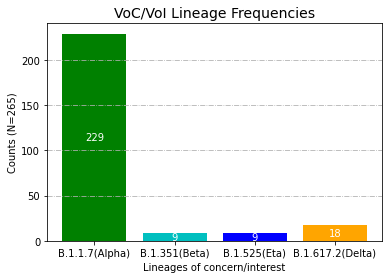

In [12]:
fig,ax = plt.subplots()
y = df_voc_grp_lin
yy = map(replace_with_who_lin, list(y.index))
y.index = yy

n = sum(y)
g = plt.bar(y.index, y, color=['g', 'c', 'b', 'orange'])
ax.bar_label(g, label_type='center', labels=list(y), color='w')
plt.ylabel(f'Counts (N={n})')
plt.xlabel('Lineages of concern/interest')
plt.grid('major', axis='y', ls='-.')
plt.title('VoC/VoI Lineage Frequencies', fontdict)
# fig.savefig(f'/home/douso/SarsGenomics/Processed/report-voci_{dt}.png')
plt.show()

In [13]:
def assign_seq_platform(x):
    x = str(x)
    if 'ONT' in x: 
        return x.replace(x, 'ONT')
    elif '_NS' in x:
        return x.replace(x, 'NextSeq')
    return x.replace(x, 'MiSeq')

In [14]:
covv_seq_tech = (df_seq_summ.assign(covv_seq_tech=df_seq_summ['run_num'].
                apply(lambda x: assign_seq_platform(x))))
                #.replace('Failed', np.NaN)

In [15]:
covv_seq_tech.head()

,sequence_name,clade,lineage,genome_coverage,run_num,seq_dt,covv_seq_tech
0,COVC11310,20C,B.1,59.3,Run1,09-02-2021,MiSeq
1,COVC00854,20C,B.1,94.9,Run7,18-05-2021,MiSeq
2,COVC00867,20C,B.1.446,68.2,Run7,18-05-2021,MiSeq
3,COVC00893,20C,B.1.446,84.1,Run7,18-05-2021,MiSeq
4,COVC00915,NaN,Failed,0.0,Run7,18-05-2021,MiSeq


In [16]:
covv_seq_tech[covv_seq_tech['genome_coverage'] >= 60].shape

(800, 7)

In [17]:
covv_seq_tech[covv_seq_tech['genome_coverage'] >= 50].shape

(849, 7)

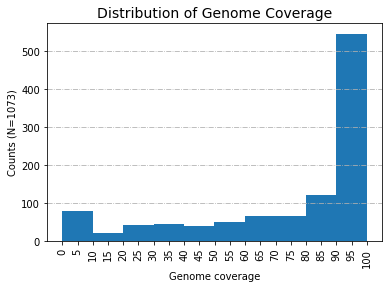

In [18]:
fig,ax = plt.subplots(1,1)
plt.hist(covv_seq_tech['genome_coverage'])
plt.xlabel('Genome coverage')
plt.ylabel(f'Counts (N={covv_seq_tech.shape[0]-1})')
plt.xticks(np.arange(0,105, 5), rotation=90)
# plt.yticks(np.arange(0,375, 25))
plt.grid('major', axis='y', ls='-.')
plt.title('Distribution of Genome Coverage', fontdict)
# ax.hlines(67, 2, 99, colors='orange', linestyles='--')
# plt.annotate('80% coverage threshold', xy=(30, 80))
# fig.savefig(f'/home/douso/SarsGenomics/Processed/report-coverage_{dt}.png')
plt.show()



In [19]:
df_seq_summ.shape

(1074, 6)

In [20]:
df_metadata = pd.read_excel('/home/douso/Documents/TrendData/Results/ResultsMerged/COVID19-results-merged-cln.xlsx')

In [21]:
df_metadata.head()

,S_NUM,AGE_YRS,GEND,OCCU,NAT,COUNT_RES,S_COUNT_RES,TRAV_HIST,TRAV_FROM,QUAR_PLACE,SYMPS,DT_SAM_COLL,DT_SAM_RECEP,RESULT,DT_CONF
0,COVC00001,35.0,F,Refugee,NaN,Garissa,Dadaab,No,NaN,NaN,NaN,NaT,NaT,Negative,2020-06-02
1,COVC00002,29.0,M,Refugee,NaN,Garissa,Dadaab,No,NaN,NaN,NaN,NaT,NaT,Negative,2020-06-02
2,COVC00003,50.0,M,Refugee,NaN,Garissa,Dadaab,No,NaN,NaN,NaN,NaT,NaT,Negative,2020-06-02
3,COVC00004,35.0,F,Casual,NaN,Garissa,Dadaab,No,NaN,NaN,NaN,NaT,NaT,Negative,2020-06-02
4,COVC00005,27.0,F,Refugee,NaN,Garissa,Dadaab,No,NaN,NaN,NaN,NaT,NaT,Negative,2020-06-02


In [22]:
df_metadata_sub = df_metadata[df_metadata['S_NUM'].isin(list(df_seq_summ['sequence_name']))]

In [23]:
df_metadata_sub.shape

(1033, 15)

In [24]:
df_metadata_sub.sort_values('DT_CONF').to_excel(f'/home/douso/Documents/TrendData/Results/ResultsMerged/all-sequenced-samples_{dt}.xlsx', index=False)

In [25]:
df_metadata[df_metadata['S_NUM'].str.contains('_')]

,S_NUM,AGE_YRS,GEND,OCCU,NAT,COUNT_RES,S_COUNT_RES,TRAV_HIST,TRAV_FROM,QUAR_PLACE,SYMPS,DT_SAM_COLL,DT_SAM_RECEP,RESULT,DT_CONF
24419,DRC-BKV-15_A,41.0,M,NaN,Democratic Republic of the Congo,Bukavu,Nan,No,NaN,NaN,CO;RN;LT;GW,2020-06-02,2021-08-02,Positive,NaT
24420,DRC-BKV-15_B,NaN,NaN,NaN,Democratic Republic of the Congo,Bukavu,Nan,No,NaN,NaN,NaN,NaT,2021-08-02,Positive,NaT
24425,DRC-BKV-166_X,NaN,NaN,NaN,Democratic Republic of the Congo,Bukavu,Nan,No,NaN,NaN,NaN,NaT,2021-08-02,Positive,NaT
24427,DRC-BKV-169_X,NaN,NaN,NaN,Democratic Republic of the Congo,Bukavu,Nan,No,NaN,NaN,NaN,NaT,2021-08-02,Positive,NaT
24438,DRC-BKV-20_A,54.0,M,NaN,Democratic Republic of the Congo,Bukavu,Nan,No,NaN,NaN,CO;RN;LT;GW;P-A,2020-06-01,2021-08-02,Positive,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24775,KEMRI_02_93645,37.0,F,NaN,Kenya,Kiambu,Githunguri,No,NaN,NaN,"Fever, Cough, Sore throat, Runny nose, Chest p...",2021-02-25,2021-07-30,Positive,2021-02-03
24776,KEMRI_02_93781,46.0,M,NaN,Kenya,Nairobi,Roysambu,No,NaN,NaN,"Cough, Difficulty in breathing",2021-02-26,2021-07-30,Positive,2021-02-03
24777,KEMRI_02_93791,34.0,F,NaN,Kenya,Nairobi,Ruaraka,No,NaN,NaN,"Cough, Sore throat, Confusion, Shortness of br...",2021-01-03,2021-07-30,Positive,2021-02-03
24778,KEMRI_02_93792,45.0,M,NaN,Kenya,Nairobi,Dagoretti south,No,NaN,NaN,NaN,2021-01-03,2021-07-30,Positive,2021-02-03


In [26]:
df_sub = df_seq_summ[df_seq_summ['sequence_name'].isin(list(df_metadata['S_NUM'])) == True]

In [27]:
len(list(df_sub['sequence_name']))

1067

In [28]:
usecols=['S_NUM', 'AGE_YRS', 'COUNT_RES', 'DT_CONF']

In [29]:
df_seq_meta = covv_seq_tech.merge(df_metadata[usecols], how='inner', left_on='sequence_name', right_on='S_NUM').drop('S_NUM', axis=1)

In [30]:
df_seq_meta.head()

,sequence_name,clade,lineage,genome_coverage,run_num,seq_dt,covv_seq_tech,AGE_YRS,COUNT_RES,DT_CONF
0,COVC11310,20C,B.1,59.3,Run1,09-02-2021,MiSeq,30.0,Garissa,2020-10-03
1,COVC11310,20C,B.1,97.0,Run8,25-05-2021,MiSeq,30.0,Garissa,2020-10-03
2,COVC00854,20C,B.1,94.9,Run7,18-05-2021,MiSeq,23.0,Nairobi,2020-06-13
3,COVC00867,20C,B.1.446,68.2,Run7,18-05-2021,MiSeq,32.0,Nairobi,2020-06-13
4,COVC00893,20C,B.1.446,84.1,Run7,18-05-2021,MiSeq,31.0,Nairobi,2020-06-13


In [31]:
df_seq_meta.columns = ['sequence_name', 'clade', 'lineage', 'genome_coverage', 'run_num',
       'seq_dt', 'seq_tech', 'age_yrs', 'county_res', 'dt_conf']

In [32]:
df_seq_meta.head()

,sequence_name,clade,lineage,genome_coverage,run_num,seq_dt,seq_tech,age_yrs,county_res,dt_conf
0,COVC11310,20C,B.1,59.3,Run1,09-02-2021,MiSeq,30.0,Garissa,2020-10-03
1,COVC11310,20C,B.1,97.0,Run8,25-05-2021,MiSeq,30.0,Garissa,2020-10-03
2,COVC00854,20C,B.1,94.9,Run7,18-05-2021,MiSeq,23.0,Nairobi,2020-06-13
3,COVC00867,20C,B.1.446,68.2,Run7,18-05-2021,MiSeq,32.0,Nairobi,2020-06-13
4,COVC00893,20C,B.1.446,84.1,Run7,18-05-2021,MiSeq,31.0,Nairobi,2020-06-13


In [33]:
df_seq_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067 entries, 0 to 1066
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   sequence_name    1067 non-null   object        
 1   clade            1037 non-null   object        
 2   lineage          1067 non-null   object        
 3   genome_coverage  1067 non-null   float64       
 4   run_num          1067 non-null   object        
 5   seq_dt           1067 non-null   object        
 6   seq_tech         1067 non-null   object        
 7   age_yrs          985 non-null    float64       
 8   county_res       1039 non-null   object        
 9   dt_conf          1067 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 91.7+ KB


In [34]:
df_gby_lin = df_seq_meta.groupby('lineage').count()#, as_index=False

In [35]:
clr_code = {'A':('midnightblue','#191970'),
'A.23':('lime','#00FF00'),
'A.23.1':('gray','#808080'),
'A.25':('orangered','#FF4500'),
'AY.4':('mediumvioletred','#C71585'),
'AY.12':('saddlebrown','#8B4513'),
'B.1':('cyan','#00FFFF'),
'B.1.1':('chocolate','#D2691E'),
'B.1.1.1':('wheat','#F5DEB3'),
'B.1.1.171':('teal','#008080'),
'B.1.1.406':('slategray','#708090'),
'B.1.1.7':('orange','#FFA500'),
'B.1.103':('seagreen','#2E8B57'),
'B.1.143':('olive','#808000'),
'B.1.153':('taffy','#F96DDA'),
'B.1.160':('honeydew','#FFD700'),
'B.1.214':('gold','#8FBC8F'),
'B.1.276':('aquamarine','#006400'),
'B.1.302':('yellowgreen','#9ACD32'),
'B.1.1.318':('slategray','#708090'),
'B.1.336':('tan','#D2B48C'),
'B.1.343':('indigo','#4B0082'),
'B.1.349':('mediumpurple','#9370DB'),
'B.1.351':('blue','#0000FF'),
'B.1.378':('darkslateblue','#483D8B'),
'B.1.388':('sienna','#A0522D'),
'B.1.390':('darkkhaki','#BDB76B'),
'B.1.393':('sapphire','#0F52BA'),
'B.1.405':('royal','#7852A9'),
'B.1.429':('khaki','#F0E68C'),
'B.1.433':('dodgerblue','#1E90FF'),
'B.1.446':('palevioletred','#DB7093'),
'B.1.517':('yellow','#FFFF00'),
'B.1.520':('cornflowerblue','#6495ED'),
'B.1.524':('pink','#FFC0CB'),
'B.1.525':('green','#008000'),
'B.1.527':('maya','#73C2FB'),
'B.1.530':('red','#AFEEEE'),
'B.1.535':('purple','#800080'),
'B.1.540':('slategray','#AF69EE'),
'B.1.549':('brown','#A52A2A'),
'B.1.551':('chocolate','#D2691E'),
'B.1.577':('silver','#C0C0C0'),
'B.1.596':('steelblue','#4682B4'),
'B.1.596.1':('magenta','#FF00FF'),
'B.1.605':('rosybrown','#BC8F8F'),
'B.1.612':('goldenrod','#DAA520'),
'B.1.617.2':('paleturquoise','#FF0000'),
'TBA10':('lavender','#E6E6FA'),
'TBA14':('seashell','#FFFAF0'),
'TBA18':('black','#000000'),
'TBA2':('cornflowerblue','#FFF5EE'),
'TBA6':('darkgreen','#7FFFD4'),
'TBA8':('darkseagreen','#F0FFF0'),
'c': ('cyan', 'c'),
'm': ('magenta', 'm'),
'k': ('black', 'k')}
avail_clr = ['TBA2', 'TBA6', 'TBA8', 'TBA10', 'TBA14', 'c', 'm', 'k']

In [36]:
clr_code_keys = list(clr_code.keys())

In [37]:
lins = df_gby_lin.sequence_name.sort_values(ascending=False)#.index
# lins

In [38]:
lin_to_be_assinged =  set(lins.index) - set(clr_code_keys)
# lin_to_be_assinged

In [39]:
import pprint
for lin, clr in zip(lin_to_be_assinged, avail_clr):
#     print(lin, clr)
    clr_code[lin] = clr_code.pop(clr)
    avail_clr.remove(clr)

In [40]:
# pprint.pprint(clr_code)
pprint.pprint(avail_clr)

['TBA6', 'TBA10', 'c', 'k']


In [41]:
def replace_with_who_lin(x):
    if x == 'B.1.1.7':
        return x.replace(x, 'B.1.1.7(Alpha)')
    if x == 'B.1.617.2':
        return x.replace(x, 'B.1.617.2(Delta)')
    if x == 'B.1.351':
        return x.replace(x, 'B.1.351(Beta)')
    if x == 'B.1.525':
        return x.replace(x, 'B.1.525(Eta)')
    return x
    

In [42]:
ylabels = list(map(replace_with_who_lin,list(lins.index)))

In [43]:
lins.index=ylabels

In [44]:
lins.values.sum()

1067

In [45]:
max_count = lins.max()
max_count

298

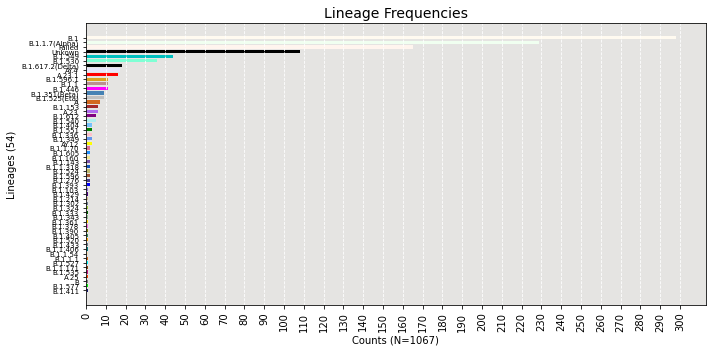

In [46]:
import math
width = lins.sort_values(ascending=True)

# colors = [clr_code[lin.split('(')[0]][1] for lin in width.index]
colors = [clr_code[lin][1] for lin in clr_code.keys()]
n = len(lins) - 2
m = sum(lins)
xticks = np.arange(0, (math.ceil(max_count / 5) + 1) * 5, 10)
fig, ax =plt.subplots(1, 1, figsize=(10,5))
ax.set_facecolor("#E5E4E2")##E5E4E2

plt.barh(width.index, width, height=0.7, log=False, color=colors)#, logy=True
plt.xticks(xticks, xticks, rotation=90)
plt.yticks(width.index, fontsize=7)
plt.grid(which='major', axis='x', ls='--', color='w')
plt.ylabel(f'Lineages ({n})')
plt.xlabel(f'Counts (N={m})')
plt.title('Lineage Frequencies', fontdict)
plt.tight_layout()
# fig.savefig(f'/home/douso/SarsGenomics/Processed/report-lineages_{dt}600.png', dpi=600.0)
plt.show()

In [47]:
df_metadata.shape[0]-153

24680

In [48]:
df_1 = df_metadata[df_metadata['S_NUM'].str.contains('COV') == False]#.shape#.\
# to_excel('/home/douso/Downloads/fjjsfbfdbfb.xlsx')

In [49]:
df_2 = df_metadata[df_metadata['S_NUM'].str.contains('COVC') == False]#.shape#.\
# to_excel('/home/douso/Downloads/fjjsfbfdbfb.xlsx')

In [50]:
set(df_2['S_NUM']) - set(df_1['S_NUM'])

{'COVE20',
 'COVE21',
 'MOH-COV-1',
 'MOH-COV-2',
 'MOH-COV-3',
 'MOH-COV-4',
 'MOH-COV-5',
 'MOH-COV-6'}

In [51]:
df_covs = df_metadata[df_metadata['S_NUM'].str.contains('COVC') == True]#.shape

In [52]:
df_covs.head()#shape

,S_NUM,AGE_YRS,GEND,OCCU,NAT,COUNT_RES,S_COUNT_RES,TRAV_HIST,TRAV_FROM,QUAR_PLACE,SYMPS,DT_SAM_COLL,DT_SAM_RECEP,RESULT,DT_CONF
0,COVC00001,35.0,F,Refugee,NaN,Garissa,Dadaab,No,NaN,NaN,NaN,NaT,NaT,Negative,2020-06-02
1,COVC00002,29.0,M,Refugee,NaN,Garissa,Dadaab,No,NaN,NaN,NaN,NaT,NaT,Negative,2020-06-02
2,COVC00003,50.0,M,Refugee,NaN,Garissa,Dadaab,No,NaN,NaN,NaN,NaT,NaT,Negative,2020-06-02
3,COVC00004,35.0,F,Casual,NaN,Garissa,Dadaab,No,NaN,NaN,NaN,NaT,NaT,Negative,2020-06-02
4,COVC00005,27.0,F,Refugee,NaN,Garissa,Dadaab,No,NaN,NaN,NaN,NaT,NaT,Negative,2020-06-02


In [53]:
df_covs['RESULT'].value_counts(dropna=False)

Negative    20855
Positive     3521
ms              7
Name: RESULT, dtype: int64

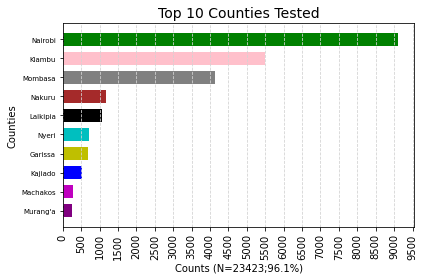

In [54]:
import math
width = df_covs['COUNT_RES'].value_counts()[:10].sort_values(ascending=True)

max_count = max(width)
# colors = [clr_code[lin.split('(')[0]][1] for lin in width.index]
# n = len(lins) - 2
m = sum(width)
n = df_covs.shape[0]
xticks = np.arange(0, (math.ceil(max_count / 500) + 1) * 500, 500)
fig, ax =plt.subplots()
# ax.set_facecolor("#E5E4E2")##E5E4E2

plt.barh(width.index, width, height=0.7, color=['purple', 'm', 'b',
                                                'y', 'c', 'k',
                                                'brown', 'gray',
                                               'pink', 'g'])#, logy=True
plt.xticks(xticks, xticks, rotation=90)
plt.yticks(width.index, fontsize=7)
plt.grid(which='major', axis='x', ls='--', color='lightgray')
plt.ylabel('Counties')
plt.xlabel(f'Counts (N={m};{round(m/n*100, 1)}%)')
plt.title('Top 10 Counties Tested', fontdict)
plt.tight_layout()
# fig.savefig(f'/home/douso/SarsGenomics/Processed/report-top10Counties_{dt}.png')
plt.show()

In [55]:
df_covs['RESULT'].value_counts(dropna=True)#[2]

Negative    20855
Positive     3521
ms              7
Name: RESULT, dtype: int64

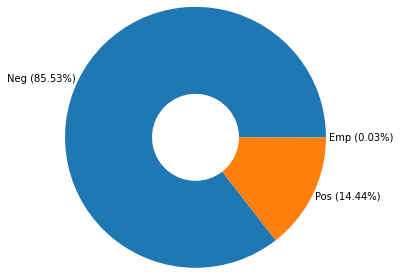

In [56]:
fig,ax = plt.subplots()

data = df_covs['RESULT'].value_counts()[:3]
pct = (np.array(data)/np.array(data).sum()*100).round(2)
plt.pie(data, wedgeprops=dict(width=1), labels=[f'Neg ({pct[0]}%)', 
                      f'Pos ({pct[1]}%)', 
                      f'Emp ({pct[2]}%)'], labeldistance=1.02, radius=1.5)
# ax.set_title('Proportions for Test Outcome', fontdict, pad=1.1)
# fig.savefig(f'/home/douso/SarsGenomics/Processed/report-results_{dt}.png')
plt.show()

In [57]:
df_seq_meta.head()

,sequence_name,clade,lineage,genome_coverage,run_num,seq_dt,seq_tech,age_yrs,county_res,dt_conf
0,COVC11310,20C,B.1,59.3,Run1,09-02-2021,MiSeq,30.0,Garissa,2020-10-03
1,COVC11310,20C,B.1,97.0,Run8,25-05-2021,MiSeq,30.0,Garissa,2020-10-03
2,COVC00854,20C,B.1,94.9,Run7,18-05-2021,MiSeq,23.0,Nairobi,2020-06-13
3,COVC00867,20C,B.1.446,68.2,Run7,18-05-2021,MiSeq,32.0,Nairobi,2020-06-13
4,COVC00893,20C,B.1.446,84.1,Run7,18-05-2021,MiSeq,31.0,Nairobi,2020-06-13


In [58]:
tops = df_seq_meta[df_seq_meta['lineage'].isin(['Failed', 'Unkown']) == False]['lineage'].value_counts().index[:10].tolist()#.head()
tops

['B.1',
 'B.1.1.7',
 'B.1.549',
 'B.1.530',
 'B.1.617.2',
 'AY.4',
 'A.23.1',
 'B.1.596.1',
 'B.1.1',
 'B.1.446']

In [59]:
# Prepare data
df = df_seq_meta[df_seq_meta['lineage'].isin(['Failed', 'Unkown']) == False]

x_var = 'dt_conf'
groupby_var = 'lineage'
df_agg = df[df['lineage'].isin(tops)].loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

colors = {i: lin_colors[i] for i, df in df_agg}
# Draw
plt.figure(figsize=(16,9), dpi= 80)
# colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, len(df_agg[x_var].unique()), stacked=True, density=False, color=colors.values(), ec='w')

# Decoration
plt.legend(colors, title='Lineages', ncol=5)
plt.title(f"Stacked Histogram of {x_var} colored by {groupby_var}", fontsize=22)
plt.xlabel('Date of confirmation')
plt.ylabel("Frequency")
# plt.ylim(0, 40)
plt.xticks(ticks=bins, labels=pd.to_datetime(bins).strftime('%Y-%m'), rotation=90, horizontalalignment='right')
plt.show()

NameError: name 'lin_colors' is not defined

In [ ]:
pd.Timestamp(44381)

In [ ]:
pd.to_datetime(bins).strftime('%Y %m')

In [ ]:
df_timeidx = df_seq_meta.set_index('dt_conf').sort_index()

In [ ]:
df_timeidx.head()

In [ ]:
df_ts = df_timeidx[df_timeidx['lineage'].isin(['Unkown', 'Failed']) == False]

In [ ]:
top10lins = df_ts['lineage'].value_counts()[:10].index

In [ ]:
df_ts2 = df_ts[df_ts['lineage'].isin(top10lins)]

In [ ]:
monthly = df_ts2.resample('W', closed='right')#['lineage'].value_counts()

In [ ]:
x = monthly['lineage'].value_counts()#.to_frame()#.T#.plot.hist(stacked=True)

In [ ]:
x_index = list(x.index)
x_counts = list(x)

In [ ]:
dict_={}
for idx,lin in zip(x_index, x_counts):
    if idx[0] in dict_:
        dict_[idx[0]][idx[1]] = lin
    else:
        dict_[idx[0]] = {}
        dict_[idx[0]][idx[1]] = lin

In [ ]:
dt_lin_ts = pd.DataFrame(columns=set(x.index.get_level_values(1)))
data = {l: 0 for l in set(x.index.get_level_values(1))}
idx = []
for k,v in dict_.items():
    data.update(v)
    dt_lin_ts = dt_lin_ts.append(data, ignore_index=True)
    idx.append(k)#.strftime('%Y-%m-%d'))
dt_lin_ts.index=idx
# dt_lin_ts

In [ ]:
dt_lin_ts.max().sort_values()#plot()

In [ ]:
# plt.style.available
lin_colors = {k: clr_code[k][1] for k,v in clr_code.items()}

In [ ]:
# plt.style.use('fivethirtyeight')
plt.style.use('seaborn')
# plt.style.use('ggplot')

fig,ax = plt.subplots(figsize=(10,4))
dt_lin_ts.plot.bar(stacked=True, ax=ax, color=lin_colors)
plt.legend(title='Lineages', bbox_to_anchor = (1, 1), fancybox=True, ncol=2)

In [ ]:
import numpy as np
from scipy.interpolate import interp1d, make_interp_spline
import matplotlib.pyplot as plt
from ipywidgets import widgets, interactive


topX = list(top10lins) + ['All']
lineage = widgets.Dropdown(options=topX, value='All', description='Lineages:')
interp_points = widgets.IntSlider(value=500, min=100, max=2100, step=500, description='Number of data points:')
 
def graph1(lineage, interp_points):
    # Dataset
    df = dt_lin_ts
    n = df.shape[0]
    
    #Get x boundaries
    start = pd.Timestamp(df.index[0])
    end = pd.Timestamp(df.index[-1])
    
    #X-locators
    dt_rng = pd.date_range(start, end, periods=n, normalize=True)
    xticks = [pd.Timestamp(dt).value for dt in dt_rng]#dt_lin_ts.index
    xlabel = [dt.strftime('%Y-%m') for dt in dt_rng]#dt_lin_ts.index
    
    #Plot canvas
    fig,ax = plt.subplots()
    
    if lineage == 'All':
        lins = df.columns
    else:
        lins = []; lins.append(lineage)
    for lin in lins:
#         df += 1
        y=df[lin]
        x_interp = np.linspace(start.value, end.value, len(y))
    
        #Train model
#         cubic_interploation_model = interp1d(x_interp, y, kind = "cubic")
        bspline_interp = make_interp_spline(x_interp, y, k=3)
 
        # Plotting the Graph
        X_=np.linspace(x_interp.min(), x_interp.max(), interp_points)
#         Y_=cubic_interploation_model(X_)
        Y_=bspline_interp(X_)

        ax.plot(X_, Y_, label=lin, color=lin_colors[lin])
        ax.legend()
    plt.title('Lineages count over time')
# ax.xaxis.set_major_locator(MultipleLocator(20))
# ax.xaxis.set_minor_locator(MultipleLocator(4))
    plt.xticks(xticks, labels=xlabel, rotation=90)
    plt.xlabel("Months")
    plt.ylabel("Lineage Counts")
    plt.show()

In [ ]:
interactive(graph1, lineage=lineage, interp_points=interp_points)

In [ ]:
from ipywidgets import widgets, interactive

In [ ]:
index = df_ts['lineage'].resample('M', closed='right').count().index

In [ ]:
ticks = [dt.value for dt in index]

In [ ]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
 
# Dataset
n=df_ts.shape[0]
x=np.arange(n)
y=np.array(df_ts['lineage'].resample('W', closed='right').count())

start = pd.Timestamp(df_ts.index[0])
end = pd.Timestamp(df_ts.index[-1])

t = np.linspace(start.value, end.value, len(y))

cubic_interploation_model = interp1d(t, y, kind = "cubic")
 
# Plotting the Graph
X_=np.linspace(t.min(), t.max(), 5000)
Y_=cubic_interploation_model(X_)

fig,ax = plt.subplots()

plt.plot(X_, Y_)
plt.title("Plot Smooth Curve Using the scipy.interpolate.interp1d Class")
ax.xaxis.set_major_locator(MultipleLocator(20))
ax.xaxis.set_minor_locator(MultipleLocator(4))
plt.xticks(ticks, labels=index, rotation=90)
plt.xlabel("Months")
plt.ylabel("Lineage Count")
plt.show()

In [ ]:
start = pd.Timestamp(df_ts.index[0])
end = pd.Timestamp(df_ts.index[-1])

In [ ]:
import numpy as np
from scipy.interpolate import interp1d

fig, ax = plt.subplots(figsize=(10, 5))

tests = df_ts['lineage'].resample('W').count()
# pos = df_tseries0['RESULT'].resample('W').count()
# neg = df_tseries1['RESULT'].resample('W').count()

tests.plot(ax=ax, marker='o', linestyle='-', label='tests')
# neg.plot(ax=ax, marker='o', linestyle='-', label='negaives')
# pos.plot(ax=ax, marker='o', linestyle='-', label='positives')

plt.xlabel('Weeks')
plt.ylabel('Number of samples')
# plt.legend()
plt.tight_layout()
# fig.savefig(f'/home/douso/Documents/TrendData/plots/draft_cov_trends_plot-line_{dt}.png')
plt.show()